In [1]:
# Python implementation of snake than can be trained using Q-learning.

In [2]:
from snake_simple_utils import *

pygame 2.0.1 (SDL 2.0.14, Python 3.8.2)
Hello from the pygame community. https://www.pygame.org/contribute.html


### Start the game

In [3]:
#--- hyper parameters ---
field_of_view_size=1#the field of view of the snake head in game-cell units. Implemented only for value 1.
gamma=0.9#temporal learning discount (discount reward that is expected far in the future)
cell_size = 40#pixel size of one game-cell


cell_number_pretrain = 5#number of game-cells when pretrainint the snake
n_pretrain_games=500#number of pre training games
random_hurdles_pretrain=True#add random hurdles on the board during pretraining

cell_number_pygame_test = 10#number of game-cells when simulating the snake in pygame
n_pygame_games=40#number of games simulated in pygame
random_hurdles_pygame=True#add random hurdles on the board during pygame simulation

In [4]:
#create an agent
agent=Agent(field_of_view_size,gamma=gamma)

In [5]:
#create an environment for pretraining
environment=Environment(cell_size,cell_number_pretrain,field_of_view_size,random_hurdles=random_hurdles_pretrain)

New longest bodylength:  3
New longest bodylength:  4
epoch  49 :  -1.716329716394959


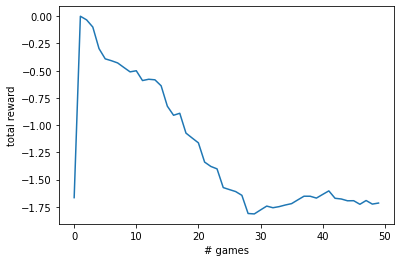

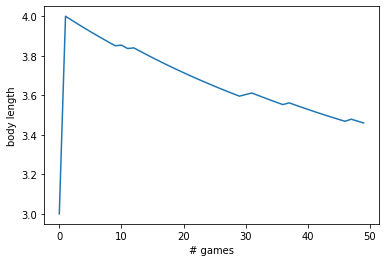

epoch  99 :  -1.9016528851297876


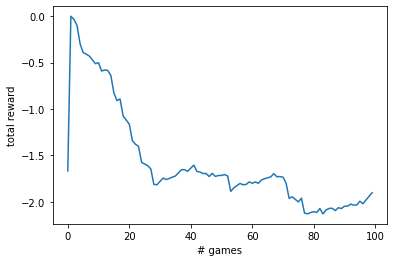

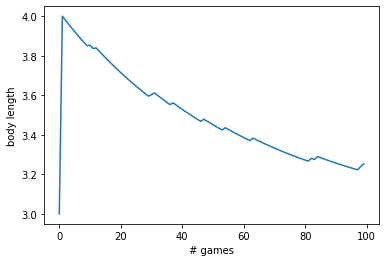

New longest bodylength:  5
New longest bodylength:  7
epoch  149 :  -1.9327543026854224


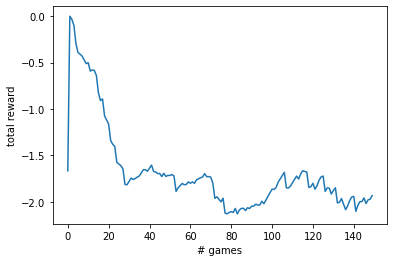

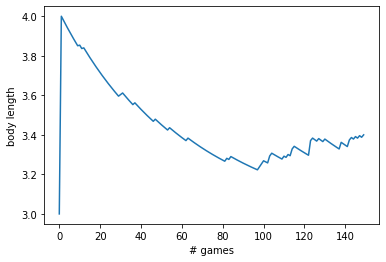

epoch  199 :  -1.9622297893658043


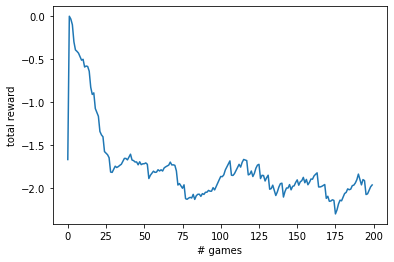

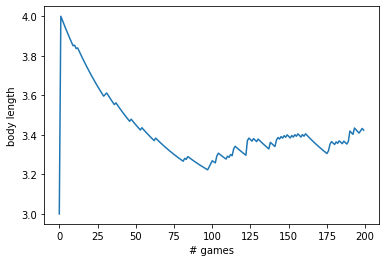

epoch  249 :  -1.1118338734610316


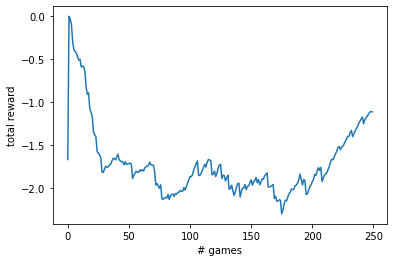

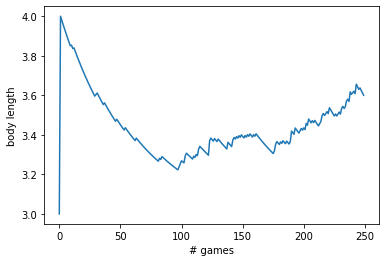

New longest bodylength:  9
epoch  299 :  -0.5704798957202659


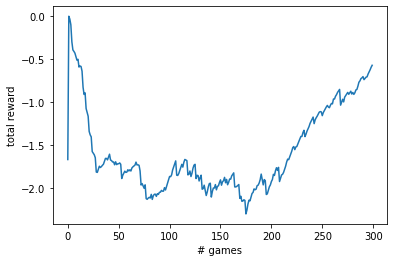

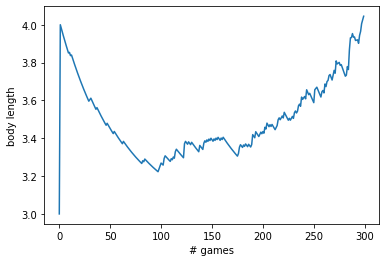

epoch  349 :  -0.18316414756697802


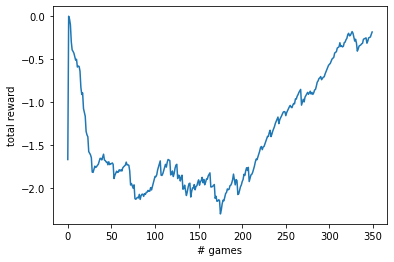

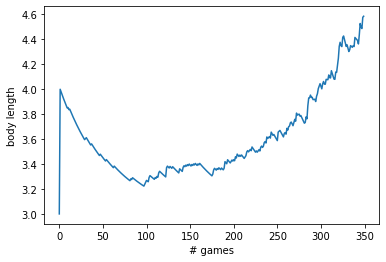

New longest bodylength:  13
epoch  399 :  -0.3481289290212315


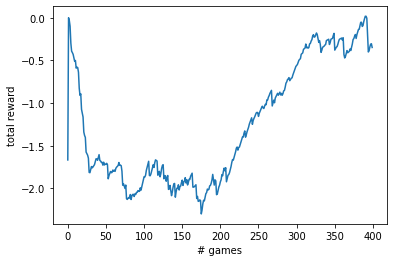

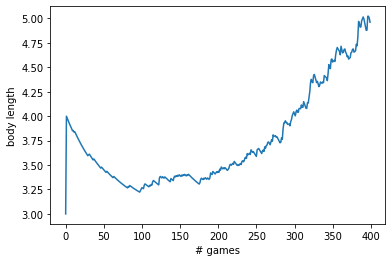

epoch  449 :  -0.4807164956994282


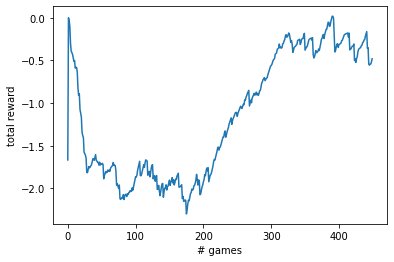

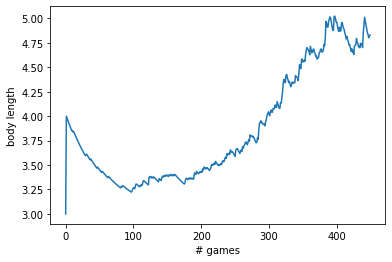

epoch  499 :  -0.23045306074503594


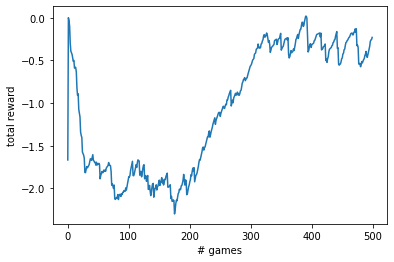

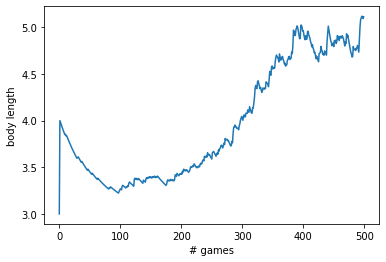

In [6]:
pretrain(n_pretrain_games,environment,agent,train_with_reflected_state=True)

In [7]:
#initialize pygame
pygame.mixer.pre_init(44100,-16,2,512)
pygame.init()
screen_size=(cell_number_pygame_test+2) * cell_size
screen = pygame.display.set_mode((screen_size,screen_size))
SCREEN_UPDATE = pygame.USEREVENT
pygame.time.set_timer(SCREEN_UPDATE,130)

In [8]:
#create an environment and graphic functions for pygame simulation
environment=Environment(cell_size,cell_number_pygame_test,field_of_view_size,random_hurdles=random_hurdles_pygame)
graphics=Graphics(cell_size,cell_number_pygame_test,screen)

In [ ]:
T=1#Exploring temperatur in the gibbs distribution of the expected rewards over the actions. The smaller T the less exploration
game_reward=0
count=0
count_snacks=0
epoch=0
environment.reset()

while True:
    for event in pygame.event.get():
        reward=training_iter(agent,environment,graphics)
        game_reward+=reward
        count+=1

        if environment.is_fail():
            print('number of snacks: ',count_snacks,'/',count,', Bodylength: ',len(environment.snake_body),
                 'Total reward: ',game_reward)
        if reward==10:
            count_snacks+=1

        graphics.draw_elements(environment)
        pygame.display.update()

        if event.type == pygame.QUIT:
            close_pygame()

        if environment.is_fail():
            epoch+=1
            if epoch>n_pygame_games:
                close_pygame()
            environment.reset()
            old_observation=agent.observe_environment(environment)
            count=0
            count_snacks=0
            game_reward=0
            

number of snacks:  3 / 34 , Bodylength:  6 Total reward:  20
number of snacks:  1 / 129 , Bodylength:  4 Total reward:  0
